In [1]:
import numpy as np
import scipy as sp
import os, sys,glob, copy
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline
import seaborn as sns

In [ ]:
## check email from Jonathan in Jim's lab
## activate newbase
#from brainio_collection import get_assembly, get_stimulus_set, list_assemblies, list_stimulus_sets
#list_assemblies()

In [10]:
#hvm = get_assembly("dicarlo.MajajHong2015")

/Users/xiaoxuanj/anaconda/envs/newbase/lib/python3.6/site-packages/brainio_base-0.1.0-py3.6.egg/brainio_base/assemblies.py:218: FutureWarning: The inplace argument has been deprecated and will be removed in a future version of xarray.
  xr_data.set_index(append=True, inplace=True, **coords_d)


In [2]:
# load IT neural data
IT = np.load('/Users/xiaoxuanj/Dropbox/jim_unsupervised_learning_paper/save_HvM/IT.npy')
V0_rep = np.load('/Users/xiaoxuanj/Dropbox/jim_unsupervised_learning_paper/save_HvM/IT_v0_rep.npy')
#V3_rep = np.load('/Users/xiaoxuanj/Dropbox/jim_unsupervised_learning_paper/save_HvM/IT_v3_rep.npy')
#V6_rep = np.load('/Users/xiaoxuanj/Dropbox/jim_unsupervised_learning_paper/save_HvM/IT_v6_rep.npy')

meta = pd.read_csv('/Users/xiaoxuanj/Dropbox/jim_unsupervised_learning_paper/save_HvM/meta_hvm.csv', index_col=0)

In [3]:
IT.shape

(5760, 168)

(array([2.54000e+02, 1.84020e+04, 4.51984e+05, 4.41774e+05, 4.76370e+04,
        6.28900e+03, 1.10200e+03, 1.99000e+02, 3.30000e+01, 6.00000e+00]),
 array([-1.9345212 , -1.3019805 , -0.6694397 , -0.03689895,  0.5956418 ,
         1.2281826 ,  1.8607233 ,  2.493264  ,  3.125805  ,  3.7583456 ,
         4.3908863 ], dtype=float32),
 <a list of 10 Patch objects>)

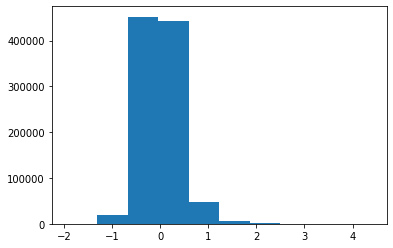

In [5]:
plt.hist(IT.flatten())

In [4]:
# distribution of variance
obj = np.unique(meta['obj'])
var = []
for o in obj:
    var.append(np.std(IT[(meta['obj']==o) & (meta['var']=='V0')],axis=0))
var = np.array(var)

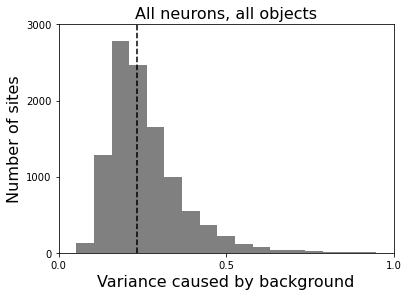

In [5]:
# variance across background/examplars
fig = plt.figure(figsize = (6,4.2))
ax = fig.add_subplot(111)

plt.hist(var.flatten(),np.linspace(0,1,20),color='gray')
plt.xlabel('Variance caused by background',fontsize=16)
plt.ylabel('Number of sites',fontsize=16)
plt.title('All neurons, all objects',fontsize=16)

plt.plot([np.median(var.flatten()),np.median(var.flatten())], [0,3000],'k', linestyle='dashed',label='Mean')
plt.xlim(0,1)
plt.ylim(0,3000)
ax.tick_params(axis='y', direction='out')
ax.tick_params(axis='x', direction='out')
ax.set_xticks([0,0.5,1])
ax.set_yticks([0,1000,2000,3000])

In [6]:
len(var.flatten())

10752

In [7]:
168*64

10752

In [6]:
3000/(168*64)

0.27901785714285715

0.90405893


(0.0, 0.3)

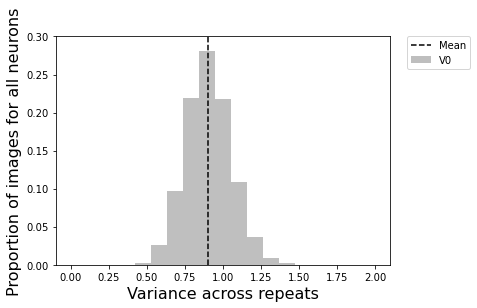

In [8]:
# variance across repeats
# Variance across reps for V0, V3 and V6
fig = plt.figure(figsize = (6,4.2))
ax = fig.add_subplot(111)
myarray = V0_rep.std(0).flatten()
weights = np.ones_like(myarray)/len(myarray)
plt.hist(myarray, weights=weights, bins=np.linspace(0,2,20),color='gray', alpha=0.5,label='V0')
print(V0_rep.std(0).flatten().mean(0))
plt.plot([np.median(V0_rep.std(0).flatten()),np.median(V0_rep.std(0).flatten())], [0,0.3],'k', linestyle='dashed',label='Mean')

plt.ylabel('Proportion of images for all neurons',fontsize=16)
plt.xlabel('Variance across repeats',fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim([0,0.3])
#plt.savefig('/Users/xiaoxuanj/Dropbox/2015.paper.Jia.UnsupervisedLearning/supplemental/variance_repeats.pdf')

In [11]:
len(V0_rep.std(0).flatten())

107520

In [27]:
#distribution of varaince across sizes for all neurons and all objects
# marginal tuning
size = meta['s']
bins=10
space = np.linspace(min(size),max(size),bins)
OBJ = np.unique(meta['obj'])

obj = np.unique(meta['obj'])
objsize = []
objall = []
for o in obj:
    tempmeta = meta[meta['obj']==o]
    a = np.array([(e,i) for i,e in enumerate(tempmeta['s'])]) # the meta needs to correspond to neural data, or causing bug
    objsize.append([a_[0] for a_ in a])
    tempIT = IT[meta['obj']==o]
    objall.append(tempIT)
objall = np.array(objall)
objsize = np.array(objsize)

# var across all bins
VAR_size = []
for n in range(168):
    bins_obj = []
    for o in OBJ:
        neuron = IT[(meta['obj']==o),n]
        size = meta[meta['obj']==o]['s']
        bins = []
        for i in range(len(space)-1):
            bins.append(np.mean([neuron[idx] for idx,s in enumerate(size) if s>=space[i] and s<=space[i+1]]))
        bins_obj.append(bins)
    #plot(space[1:],bins)
    VAR_size.append(bins_obj)

# only three bins
bins = 10
size = meta['s']
fixbins = np.linspace(min(size),max(size),bins)
neuron_var=[]
for o in range(64):
    temp=[]
    for n in range(168):
        digitized = np.digitize(objsize[o,:], fixbins)
        bin_means=np.array([objall[o,:,n][digitized == i].mean() for i in range(1, len(fixbins))])
        temp.append(np.nanstd(bin_means[[0,5,8]]))
    neuron_var.append(temp)
print(np.mean(np.ma.masked_invalid(np.std(VAR_size,axis=2).flatten())))
print(np.mean(np.ma.masked_invalid(np.array(neuron_var).flatten())))

/Users/xiaoxuanj/anaconda/envs/newbase/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: Mean of empty slice.
/Users/xiaoxuanj/anaconda/envs/newbase/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


0.11959227506449278
0.11007210186549596


In [28]:
np.ma.masked_invalid(np.array(neuron_var)).shape

(64, 168)

In [29]:
size_var_mean = np.mean(np.ma.masked_invalid(np.array(neuron_var).flatten()))
size_var_median = np.median(np.ma.masked_invalid(np.array(neuron_var).flatten()))

/Users/xiaoxuanj/anaconda/envs/newbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


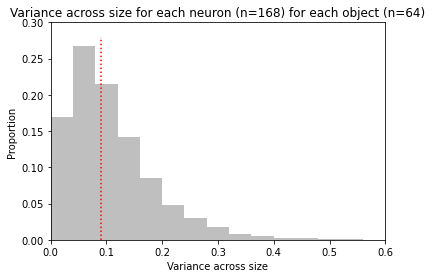

In [46]:
#plt.hist(np.ma.masked_invalid(np.array(neuron_var)).flatten(),color='gray', alpha=0.5,bins = np.arange(0, 0.8,0.01))

myarray = np.ma.masked_invalid(np.array(neuron_var)).flatten()
weights = np.ones_like(myarray)/len(myarray)
plt.hist(myarray, weights=weights, bins=np.arange(0, 0.6,0.04),color='gray', alpha=0.5,label='V0')
plt.plot([size_var_median, size_var_median], [0,0.28], 'r:')
plt.ylim([0,0.3])
plt.xlim([0,0.6])
plt.xlabel('Variance across size')
plt.ylabel('Proportion')
plt.title('Variance across size for each neuron (n=168) for each object (n=64)')
plt.savefig('/Users/xiaoxuanj/Dropbox/2015.paper.Jia.UnsupervisedLearning/supplemental/variance_size.pdf')

In [47]:
# same 3 size bins and range for data and model prediction

cov = np.cov(np.mean(objall,axis=1)) #64 dimensional covariance matrix
m = objall.mean(1).mean(1)
rseed = 1
points = 168 # mimic real data
rng = np.random.RandomState(rseed)
X_test = rng.multivariate_normal(m, cov, size=points)

size = meta['s']
xp = np.linspace(min(size),max(size),10)
xp = xp[[0,4,9]]
units = -np.array(range(1,65))
size_std_mean=[]
size_std_median=[]
size_std_std=[]
NUM=[]
for u in units:
    print(u)
    pfit = []
    Vfit = []
    for n in range(168):
        resp = np.mean(objall[:,:,n],axis=1)
        sort_index = np.argsort(resp)
        rank = sort_index[u:]
        bins = 10
        fixbins = np.linspace(min(size),max(size),bins)
        BIN_means = []
        for o in rank:
            digitized = np.digitize(objsize[o,:], fixbins)
            BIN_means.append(np.array([objall[o,:,n][digitized == i].mean() for i in range(1, len(fixbins))]))
        bin_means = np.ma.masked_invalid(BIN_means).mean(0)
        temp = fixbins[:(bins-1)]     
        x = temp
        y = bin_means    
        z = np.polyfit(x, y, 5) # 5 free parameters, same as DOG
        p = np.poly1d(z) 
        yy=p(x)
        V = np.round(sum([(y[i]-yy[i])**2 for i in range(len(y))])/len(y),5)
        
        pfit.append(z)
        Vfit.append(V)
    
    size_kernal = np.array(pfit)[[idx for idx, d in enumerate(Vfit) if d<=0.1]]   
    NUM.append(len(size_kernal))
    
    # 3 size points
    xp = np.linspace(min(size),max(size),10)
    xp = xp[[0,4,9]]
    
    sigma_size=0
    size_tuning_test = []
    for n in range(points):
        if n<len(size_kernal):
            p = np.poly1d(size_kernal[n]) 
        else:
            r = np.random.choice(range(np.shape(size_kernal)[0])) # randomly choose kernal for each neuron, size tuning parallel for all objects
            p = np.poly1d(size_kernal[r]) 
        
        temp = []
        for o in range(len(obj)):
            # 9 points in xp, different from modeled population
            base = np.mean(p(xp))-X_test[n,o]
            ttemp = p(xp)-base

            if sigma_size!=0:
                temp_size1 = rng.normal(ttemp[0], sigma_size, 1) # jitter for each object
                temp_size2 = rng.normal(ttemp[1], sigma_size, 1)
                temp_size3 = rng.normal(ttemp[2], sigma_size, 1)
                temp.append([temp_size1[0],ttemp[1],temp_size3[0]])
            else:
                temp.append(ttemp)
                
                                
        size_tuning_test.append(temp)
    size_var = np.array(size_tuning_test).std(2).flatten()
    size_std_mean.append(np.mean(size_var))
    size_std_median.append(np.median(size_var))
    size_std_std.append(np.std(size_var)/np.sqrt(len(size_var)))

-1


/Users/xiaoxuanj/anaconda/envs/newbase/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: Mean of empty slice.


-2
-3
-4
-5
-6
-7
-8
-9
-10
-11
-12
-13
-14
-15
-16
-17
-18
-19
-20
-21
-22
-23
-24
-25
-26
-27
-28
-29
-30
-31
-32
-33
-34
-35
-36
-37
-38
-39
-40
-41
-42
-43
-44
-45
-46
-47
-48
-49
-50
-51
-52
-53
-54
-55
-56
-57
-58
-59
-60
-61
-62
-63
-64


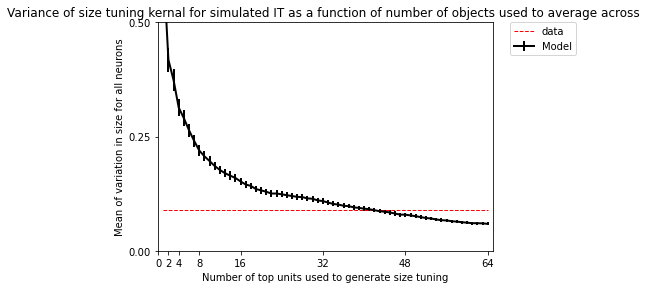

In [64]:
fig = plt.figure(figsize = (6,4.2))
ax = fig.add_subplot(111)
plt.errorbar(np.array(range(1,65)),np.array(size_std_mean),np.array(size_std_std)*np.sqrt(len(size_var))/np.sqrt(168),linewidth=2,color = 'k', ecolor = 'k',label='Model')
myarray = np.array(neuron_var).flatten()
plt.plot([1,64],[np.median(myarray),np.median(myarray)],linewidth=1,color = 'r',linestyle='dashed',label='data')
plt.xlim(0,65)
plt.ylim(0,0.5)
ax.tick_params(axis='y', direction='out')
ax.tick_params(axis='x', direction='out')
ax.set_xticks([0,2,4,8,16,32,48,64])
ax.set_yticks([0,0.25,0.5])
plt.xlabel('Number of top units used to generate size tuning')
plt.ylabel('Mean of variation in size for all neurons')
plt.title('Variance of size tuning kernal for simulated IT as a function of number of objects used to average across ')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [60]:
tmp = abs(np.array(size_std_mean)-np.median(myarray))
np.where(tmp==min(tmp))

(array([41]),)

In [65]:
np.array(size_tuning_test).shape

(168, 64, 3)

(array([55., 54., 28., 19.,  7.,  3.,  1.,  0.,  0.,  1.]),
 array([0.00272881, 0.03325342, 0.06377803, 0.09430264, 0.12482724,
        0.15535185, 0.18587646, 0.21640106, 0.24692567, 0.27745028,
        0.30797489]),
 <a list of 10 Patch objects>)

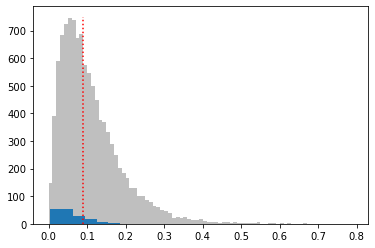

In [74]:
plt.hist(np.ma.masked_invalid(np.array(neuron_var)).flatten(),color='gray', alpha=0.5,bins = np.arange(0, 0.8,0.01))
plt.plot([size_var_median, size_var_median], [0,750], 'r:')
plt.hist(np.array(size_tuning_test).std(-1)[:,41])

In [ ]:
# load model IT data